# Proyecto

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Pablo Badilla
- Auxiliar: Ignacio Meza D.
- Ayudante: Patricio Ortiz

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*


----

## Reglas

- Fecha de entrega: 15/07/2021 (atrasos hasta el domingo 17 de julio)
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia. 
- Pueden usar cualquier material del curso que estimen conveniente.

---

## El Desafío de Renacín 🧸

<div align='center'>
<img src='https://media.cnnchile.com/sites/2/2018/09/maipu-renacin-740x430.jpg' width=300>
</div>

Renacín, ex-influencer y figura (de peluche) publica; luego de su despido, decide que será una buena idea darle un giro a su vida y dedicarse al rubro del asesoramiento de inversionistas en la industria del cine. 

El futuro empresario plantea que el éxito potencial de una propuesta película debe ser analizado en base a evidencia histórica de cintas similares y no en la intuición ni en simples corazonadas. 
Por esto, plantea a las gerencias de las principales productoras de cine que sería ideal contar con una máquina que, dada las características de una propuesta de película (su género, la productora, su duración, su historia, etc...), prediga si esta será potencialmente una inversión rentable o no.

Renacín está convencido que el éxito de una inversión en un filme debe estar relacionada por dos características muy relevantes de estas una vez que salen al mercado:

**1. La potencial evaluación (Positiva, Negativa, etc...) que le dan sus consumidores.**

**2. Las potenciales ganancias de la película.**

Si bien la idea puede sonar excelente, Renacín carece en su totalidad de una formación en Ciencia de los Datos, por lo que decide ir en ayuda de expertos para implementar su idea. 

Sin embargo, decide no contratar a un equipo en particular, si no que tener la libertad de elegir entre muchos equipos que compiten entre si para saber cuál contratar. Para esto recurre a una triquiñuela recurrentemente utilizada en Data Science: Establecer una competencia abierta y pagar por el mejor modelo (i.e, que cumpla mejor sus requisitos).

Para esto, el ex-influencer decide abrir una competencia en la plataforma [Codalab](https://codalab.lisn.upsaclay.fr/competitions/5521?secret_key=7ecfd279-9521-457d-8602-616532fcd813) (plataforma similar a Kaggle) la cuál, espera que se replete de buenos modelos. Los equipos que mejor evaluaciones obtengan (los primeros 3 de cada tabla) serán contratados y retribuidos con un cupón canjeable con la friolera cantidad de 1 punto bonus para el proyecto en el curso MDS7202.





### Definición Formal del Problema

El objetivo de este proyecto es aplicar todo lo aprendido hasta este momento con el fin de solucionar 2 problemas distintos: 

1. **Clasificación de potenciales evaluaciones con las que los consumidores evaluarán las películas**. Las posibles clases que deben asignar a cada juego son `('Negative', 'Mixed', 'Mostly Positive', 'Positive', 'Very Positive')`. La métrica de evaluación utilizada para medir la clasificación es `f1_macro`.
2. **Regresión de los potenciales ingresos que tendrán las películas**. La métrica de evaluación utilizada para medir la clasificación es `r_2`.

Para esto, ustedes contarán un dataset que cuenta con diversa información sobre películas (tales como productora, actores, duración, fecha de lanzamiento, keywords, etc...) más las etiquetas y valores a predecir.

El objetivo final es que generen el mejor modelo posible para ambos problemas y que con estos, participen en la competencia habilitada en el siguiente ([link](https://codalab.lisn.upsaclay.fr/competitions/5521?secret_key=7ecfd279-9521-457d-8602-616532fcd813)).

### Competencias de Data Science

> Una competencia de Data Science funciona generalmente de la siguiente manera: 

1. Se plantea un problema que los equipos deben resolver.
2. Se provee de datos de entrenamiento a los equipos para que generen modelos que resuelvan el problema.
3. Se provee de datos de prueba que los equipos deberán predecir con los modelos creados. Una vez predichos, los equipos deben subir los archivos a la plataforma, la cuál los evaluará y publicará en un tablero disponible para todos los participantes.

Existen muchos sitios en donde se publican competencias recurrentemente tales como [Kaggle](https://www.kaggle.com/) y [Codalab](https://codalab.lisn.upsaclay.fr/).

### Competencia del Proyecto

Para este proyecto, para participar en la competencia se les proveerá de tres datasets: `train_numerical_features.parquet`, `train_text_features.parquet` y `test.pickle`.

- `train_numerical_features.parquet` y `train_text_features.parquet` deben usarlos como conjunto de entrenamiento del modelo; por lo que incluye las etiquetas y valores por predecir. noten que esto no implica que no deban hacer *holdout* para evaluar internamente su modelo (en este caso, el set de test es llamado de *validación*). Por otro lado, se recomienda que junten ambos archivos para generar el tablón final de entrenamiento.

- `test.pickle` se usará para evaluar el rendimiento de sus modelos en la competencia. Es decir, este dataset solo contiene características de las películas y ustedes deberán predecir tanto las potenciales evaluaciones como las ganancias de estas y subir sus resultados.

Para subir archivos a la competencia deberán registrarse en Codalab. Para evitar overfitting y/o que intenten adivinar los datos de testing, **puden participar máximo 5 veces en la competencia**. Usenlos sabiamente.

**MUY IMPORTANTE**: Para la clasificación no usen las ganancias (target de la regresión) como atributo. Por otro lado, para la regresión no utilicen las evaluaciones como atributo para predecir. **Infringir estas reglas implicará en no contar el puntaje de la competencia como también descuentos en los items de clasificación como de regresión.** Recuerden que esta es información del "futuro": cuando estén las propuestas de películas no dispondremos de estas.






# Proyecto

### Equipo:

- Natalia Abarca G.
- César Véliz R.

- Cuenta CodaLab: nveliz

### Link de repositorio de GitHub: `https://github.com/CVelizR/evaluaciones-mds7202`



In [1]:
# Librería Core 
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from scipy import stats

import seaborn as sns

from sklearn.model_selection import train_test_split 

# Pre-procesamiento
from sklearn.feature_selection import SelectPercentile, f_classif, f_regression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# Clasifación
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import ElasticNet, Lasso

# Metricas de evaluación
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import r2_score





import xgboost as xgb

# Librería para plotear
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from matplotlib import pyplot as plt

# Proyecciones en baja dimensionalidad: UMAP
from umap import UMAP

# Librería para NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize  
from nltk.stem import PorterStemmer
stop_words = stopwords.words('english')

#Librería tiempo

import datetime

#Librerías pandas
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype
from IPython.display import display, Markdown, Latex

import missingno as msno

import collections

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## 1. Introducción

Los objetivos principales de este proyecto consisten en lograr clasificar el nivel de aceptación que tendrá una película, como también la cantidad de ingresos que está generará. Por lo que se debe lidiar con un problema de clasificación y regresión respectivamente. 

Los datos que se proveen se encuentran en 2 datasets, uno con la información numérica (train_numerical) y otro con información en formato de texto (train_texto). Tanto el conjunto train_text como train_numerical poseen 9641 ejemplos. Entre los 2 conjuntos se tienen características como lo son: el nombre de la película, los actores involucrados, productoras, presupuesto, sinopsis, etc.

Al unir los 2 dataframes se tiene un total de 17 características y la variable objetivo para el problema de clasificación estará dada por vote_average, la cual representa la nota de la película en una escala del 1 al 10 según el promedio de notas de distintas personas. Por otro lado, la variable objetivo para la regresión será "revenue", en la cual se encuentran las ganancias de cada película. Es importante notar que para trabajar la variable de vote_average como etiqueta de un problema de clasificación se categorizó en 5 clases mediante un encoder.

El modelo de clasificación se evaluó en base a la métrica F1 Macro ya que esta permite promediar tanto el precision (cantidad de datos predichos como cierta clase correctamente dividido por la cantidad de datos que realmente son de dicha clase ) como el recall (la cantidad de datos predichos correctamente para dicha clase dividido por la cantidad de datos que el modelo predijo como dicha clase). Por otro lado, al ocupar el promedio macro, se calcula métricas para cada etiqueta y se encuentra su media no ponderada. Notar que esto no tiene en cuenta el desequilibrio de clases.

Por otro lado, el modelo de regresión se evaluó en base a la métrica R2, la cual cuantifica el grado de correlación entre los valores reales y predichos. Notar que esta métrica va del 0 al 1, dónde 0 indica baja correlación y 1 es que los datos están totalmente correlacionados.

Tras probar distintos modelos y configuraciones, nuestra propuesta para resolver el problema consistió en modelo de clasificación basado en XGBoostClassifier. Por otro lado, para el problema de regresión se utilizó un modelo XGBoostRegressor.

Tras haber entrenado los modelos, utilizado una grilla para buscar los mejores hiperparámetros y poner a prueba nuestro modelo en la competencia en CodaLab, se concluye que si bien nuestro modelo puede seguir siendo optimizado y tiene un porcentaje de fallo no menor, aún así sigue siendo mejor que un modelo dummy, por lo que se logró cumplir con el objetivo del proyecto.

---
## 2. Prepración y Análisis Exploratorio de Datos

### 2.1 Carga y Preparación de datos

En está sección se procede a cargar y preparar los datos para poder iniciar el proyecto. Entre los pre-procesamientos realizados se tiene: eliminación columnas que a futuro no tendrán uso, filtración de filas con datos faltantes, formateo de fechas y preparación de la columna correspondiente a las etiquetas del problema de clasificación

In [2]:
##  Código Preparación de Datos.
train_numerical = pd.read_parquet("train_numerical_features.parquet")
train_text = pd.read_parquet("train_text_features.parquet")
test = pd.read_pickle("test.pickle")

In [3]:
# Fusionar datos
train = pd.merge(
    left = train_numerical,
    right = train_text,
    on = "id",
    sort = True,
    how = "outer")

In [4]:
# Dropear columnas
train.drop(["poster_path", "backdrop_path", "recommendations"], axis=1, inplace=True)

In [5]:
# Filtrar
train = train[train.revenue != 0]
train = train.dropna(subset=["release_date"],axis=0)
train = train[train.runtime != 0]

# TEST
test = test.dropna(subset=["release_date"],axis=0)
test = test[test.runtime != 0]

In [6]:
# Convertir fechas
train["release_date"] = pd.to_datetime(train["release_date"])

#TEST
test["release_date"] = pd.to_datetime(test["release_date"])

In [7]:
# Conservar solo los ejemplos con status "Released".
train = train[train.status == "Released"]
train.drop(["status"],axis=1,inplace=True)

# Test
test = test[test.status == "Released"]
test.drop(["status"],axis=1,inplace=True)

In [8]:
# Rellenar valores nulos categóricos y de texto con ''
numeric = ["id", "budget", "revenue", "runtime"]
not_numeric =  train.drop(numeric,1).columns.to_list()
train[not_numeric] = train[not_numeric].replace(np.nan, "")

In [9]:
# Discretizar vote_avarage
train["vote_average"] = pd.cut(train["vote_average"], 
                               bins=[0, 5, 6, 7, 8, 10],
                               labels=["Negative", "Mixed", "Mostly Positive", "Positive", "Very Positive"])

train["label"] = train["vote_average"].to_list()

In [10]:
# Eliminar la columna vote_average e id
#train.drop(["vote_average", "id","release_date"], axis=1, inplace=True)
train.drop(["vote_average", "id"], axis=1, inplace=True)

In [11]:
# Renombrar la columna revenue por target
train.rename(columns={"revenue": "target"}, inplace=True)

In [12]:
# Dropear columnas idénticas

train.drop(["tagline_y", "credits_y", "title_y"], axis=1, inplace=True)
train.rename(columns={"tagline_x": "tagline", "credits_x": "credits", "title_x": "title"}, inplace=True)

In [13]:
train.reset_index(drop=True, inplace=True)

## 2.2 EDA

### Análisis tipo de datos y distribuciones de las variables a través de histogramas

Para esta sección se estudiará la distribución de las variables numéricas.

Lo primero que se hizo fue definir una función que permite obtener información estadística de dichas distribuciones, como también un gráfico de histogramas y de dispersión.

In [14]:
## Código EDA


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe(datetime_is_numeric=True)])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Número de observaciones",
            "mean": "Promedio",
            "std": "Desviación estándar",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - Con Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Sin Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns={"index": serie.name, serie.name: "Count"})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [15]:
profile_serie(train["budget"])

## budget Profile

Type                               float64
Número de observaciones             6451.0
Promedio                   29864697.439777
Desviación estándar        41803784.187383
Min                                    0.0
25%                              2600000.0
50%                             15000000.0
75%                             39000000.0
Max                            380000000.0
Negative                                 0
Negative (%)                         0.0 %
Zeros                                 1119
Zeros (%)                          17.35 %
Kurt                               8.38457
Skew                              2.568211
                                          
Missing cells                            0
Missing cells (%)                    0.0 %
Duplicate rows                        6051
Duplicate rows (%)                  93.8 %
Total size in memory           51736 bytes
dtype: object

Para la variable budget, se aprecia una gran concentración de datos entre 0 a 20 millones. También se aprecia que hay películas que tuvieron presupuesto 0, es altamente posible que esto se deba a que la información no se encontraba presente a la hora de registrarlo en el dataset. 

In [16]:
profile_serie(train["runtime"])

## runtime Profile

Type                           float64
Número de observaciones         6451.0
Promedio                     108.84359
Desviación estándar          20.173254
Min                                4.0
25%                               95.0
50%                              105.0
75%                              119.0
Max                              366.0
Negative                             0
Negative (%)                     0.0 %
Zeros                                0
Zeros (%)                        0.0 %
Kurt                          8.070732
Skew                          1.556856
                                      
Missing cells                        0
Missing cells (%)                0.0 %
Duplicate rows                    6416
Duplicate rows (%)             99.46 %
Total size in memory       51736 bytes
dtype: object

Para la variable Runtime, se tiene que esta tiene una distribución similar a una normal, donde la concentración de la duración de las películas se encuentra alrededor de 100 minutos.

In [17]:
profile_serie(train["target"])

## target Profile

Type                                float64
Número de observaciones              6451.0
Promedio                    92580115.900481
Desviación estándar        175620724.467102
Min                                     1.0
25%                               7937442.0
50%                              31429330.0
75%                              98226570.0
Max                            2847246203.0
Negative                                  0
Negative (%)                          0.0 %
Zeros                                     0
Zeros (%)                             0.0 %
Kurt                              40.085268
Skew                               4.947039
                                           
Missing cells                             0
Missing cells (%)                     0.0 %
Duplicate rows                          351
Duplicate rows (%)                   5.44 %
Total size in memory            51736 bytes
dtype: object

Finalmente, con respecto a la columna target, se tiene que una distribución similar a la de budget. Notar que el mínimo en el dataset es de 1. Es posible que esto pueda ser un error, puesto que ingresos de 1 dólar para una película, aunque sea de muy bajo presupuesto, parece extraño.

### Visualizaciones de las interecciones en las distintas variables

In [18]:
#Scatter Matrix
fig = px.scatter_matrix(train[["budget","runtime","target"]])
fig.show()

De la matriz de ScatterPlots no se aprecia una correlación muy clara entre las características. No obstante, se aprecia una leve correlación entre budget y target

A continuación se define una función que permite obtener la correlación entre las variables y verificar si existen datos nulos

In [19]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = ["budget","runtime","target"]

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df.corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Correlation:

## Missing Matrix:

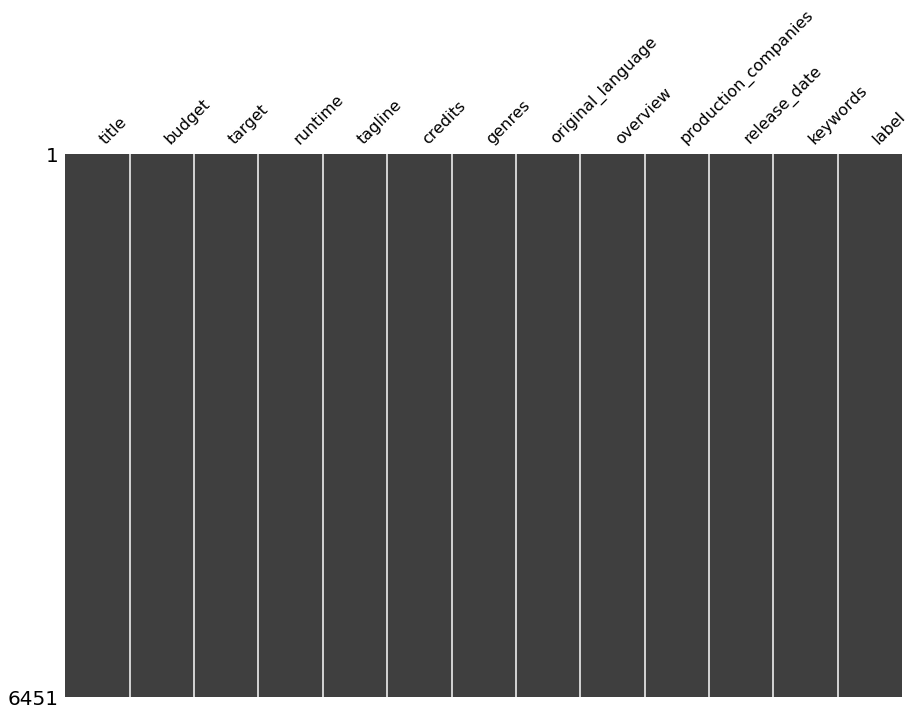

In [20]:
corr=train.copy()
profile_df(corr)

De los resultados, se aprecia que no existen datos nulos, y que efectivamente existe una correlación positiva entre budget y target.

### Proyección UMAP

In [21]:
features = train[["budget","runtime","target"]]

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=train.label, labels={'color': 'label'}
    
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=train.label, labels={'color': 'label'}
)
fig_3d.update_traces(marker_size=5)

#color=df.species, labels={'color': 'species'}

fig_2d.show()
fig_3d.show()

Del gráfico mediante UMAP, no se logra una distinción clara entre las distintas clases, puesto que la mayoría de datos se encuentran muy dispersos. Adicionalmente también se aprecia un desbalance de clases.

### Scatterplot de budget vs target

In [22]:
fig=px.scatter(train,x="budget",y="target")
fig.show()

Del gráfico de dispersión se aprecia una leve correlación positiva entre los datos, y esto se confirma con el hecho de haber obtenido una correlación de 0.73 en la matriz de correlación calculada anteriormente.

### Scatterplot de budget vs target para películas Marvel

In [23]:
fig=px.scatter(train[train["production_companies"]=="Marvel Studios"],x="budget",y="target",hover_name="title")
fig.show()

Tras graficar un scatterplot entre el presupuesto vs los ingresos para películas de Marvel Studios, se aprecia una alta correlación. Esto tiene sentido puesto que dicho estudio es grande dentro de la industria cinematográfica, por lo que pueden invertir una gran cantidad de presupuesto, asegurando por lo general una gran cantidad de ingresos. Por otro lado, debido a la popularidad de sus películas, incluso se aprecian casos de películas sin tanto presupuesto (para los estándares del estudio) que generaron ganancias bastante considerables, como se aprecia en Capitana Marvel en el gráfico.

### Gráfico de barras de las 50 productoras más frecuentes

In [24]:
productoras=train.copy()
productoras["production_companies"] = productoras["production_companies"].apply(lambda x: x.split("-"))

list_productoras = []
for p in productoras["production_companies"]:
    list_productoras += p

suma = [1]*len(list_productoras)
df_top_prod = pd.DataFrame({"productoras": list_productoras, "cuenta": suma})
df_top_prod = df_top_prod.groupby("productoras").sum().sort_values(by="cuenta", ascending=False).reset_index().head(50)

px.bar(df_top_prod,x="productoras",y="cuenta")


Del Gráfico, se aprecia que existen "Mega Productoras", puesto que el top 5 producen considerablemente más películas en comparación con el resto.

### Gráfico de barras de las 50 artistas más frecuentes

In [25]:
#Funciones auxiliares
def eliminar_nombres(x):
    new_x=x.copy()
    remover=[]
    for i in x:
        value=sentence_count(i)
        if value==0:
            remover.append(i)
        else:
            None
            
    for i in remover:
        new_x.remove(i)

    return new_x

def sentence_count(text):
    res = len(text.split())
    if res>1:
        return 1
    else:
        return 0     

In [26]:
#Se aplican las funciones auxiliares para separar los artistas 
#También se eliminan nombres que contengan sólo "-"
actores=train.copy()
actores["credits"] = actores["credits"].apply(lambda x: x.split("-"))
actores["credits"] = actores["credits"].apply(lambda x: eliminar_nombres(x))

list_actores = []
for a in actores["credits"]:
    list_actores += a

suma = [1]*len(list_actores)
df_top_actores = pd.DataFrame({"actores": list_actores, "cuenta": suma})
df_top_actores = df_top_actores.groupby("actores").sum().sort_values(by="cuenta", ascending=False).reset_index().head(50)

px.bar(df_top_actores,x="actores",y="cuenta")

Del gráfico, se aprecia que la mayoría de los actores en el top tienen una cantidad de apariciones relativamente similar. Incluso dentro del top 5, la diferencia con los últimos puestos del top 50 no son tan notorias.

## Preprocesamiento, Feature Engineering, ColumnTransformer y Holdout

### 3.1 Preprocesamiento

Con respecto al preprocesamiento, se omitirá la limpieza de datos nulos debido a que esto se realizó en las secciones anteriores. 

Por otro lado, con el fin de simplificar el proceso de Feature Engineering para las variables que contienen texto, se generarán transformaciones pertinentes.

#### Variable Credits

Para la columna credits, lo que se realizó fue separar los nombres (los cuales estaban separados por guión), con el fin de generar una lista por cada registros que contiene el nombre de cada uno de los actores. Es importante mencionar que se hizo uso de la función auxiliar "eliminar_nombres", la cual se definió en la sección de la EDA y que permite eliminar de las listas los nombres que contienen un guión como lo es por ejemplo Jean-Pierre (puesto que los separaba como 2 nombres distintos).

In [27]:
#Train

#Se separan los nombres de los actores mediante el "-"
train["credits"] = train["credits"].apply(lambda x: x.split("-"))
#Se eliminan los nombres que contienen guión como "Jean-Pierre"
train["credits"] = train["credits"].apply(lambda x: eliminar_nombres(x))

#Test

test["credits"] = test["credits"].apply(lambda x: x.split("-"))
test["credits"] = test["credits"].apply(lambda x: eliminar_nombres(x))

#### Variable Genres

El procesamiento que se realizó a genres consistió en separar los géneros en una lista de Python, de forma similar a lo que se realizó con credits.

In [28]:
#Train

#Se separan los nombres de los generos mediante el "-" y se transforma la columna en una lista
train["genres"] = train["genres"].apply(lambda x: x.split("-"))

test["genres"] = test["genres"].apply(lambda x: x.split("-"))

#### Variable Production_companies

Al igual que genres, se separaron los nombres de la productoras en una lista de Python mediante el símbolo "-".

In [29]:
#Train

#Se separan los nombres de las productoras mediante el "-" y se transforma la columna en una lista
train["production_companies"] = train["production_companies"].apply(lambda x: x.split("-"))

#Test 

test["production_companies"] = test["production_companies"].apply(lambda x: x.split("-"))

#### Variable Keywords

El preprocesamiento para Keywords fue análogo a las características anteriores. Se separó cada keyword mediante el "-" en una lista de Python.

In [30]:
#Train

#Se separan los nombres de las palabras claves mediante el "-" y se transforma la columna en una lista
train["keywords_aux"] = train["keywords"].apply(lambda x: x.split("-"))

#Test

test["keywords_aux"] = test["keywords"].apply(lambda x: x.split("-"))

### 3.2 Feature Engineering

Tras el preprocesamiento anterior, se procedió a realizar Feature Engineering. Es decir, se realizaron transformaciones a las características originales con el fin de obtener nueva información que pueda ser interpretada de mejor manera por el modelo a la hora de entrenar y generar predicciones.

#### Credits

A partir de la variable credits, se crearon 2 nuevas columnas. Una de ellas consistió en el número de actores que la película posee (denominada como "num_actors"), mientras que la segunda consitió en la cantidad de actores "populares" presentes en dicha película (num_celebrities). El criterio para decidir si un actor es una celebridad está dado por lo realizado en la EDA, es decir, se realizó un conteo de los actores más frecuentes en la base de datos y se generó un ranking. Si el actor está dentro del top 500, entonces será considerado como una celebridad. 

In [31]:
#Se seleccionan actores populares (top 500)
actores = []
for a in train["credits"]:
    actores += a

suma = [1]*len(actores)
df_actores = pd.DataFrame({"actores": actores, "cuenta": suma})

#Dataframe con el top 500
df_actores = df_actores.groupby("actores").sum().sort_values(by="cuenta", ascending=False).reset_index().head(500)
celebridades = df_actores["actores"].to_list()

#Train 

#Se agrega la columna con el número de actores presentes en la película
train["num_actors"] = train["credits"].apply(lambda x: len(x))
#Se agrega la columna con el número de celebridades presentes en la película
train["num_celebrities"] = train["credits"].apply(lambda x: len(celebridades) - (len(collections.Counter(celebridades) - collections.Counter(x))))

#Test

test["num_actors"] = test["credits"].apply(lambda x: len(x))
test["num_celebrities"] = test["credits"].apply(lambda x: len(celebridades) - (len(collections.Counter(celebridades) - collections.Counter(x))))

In [32]:
# Check
train[["credits", "num_actors", "num_celebrities"]]

,credits,num_actors,num_celebrities
0,"[Tim Roth, Jennifer Beals, Antonio Banderas, V...",24,4
1,"[Emilio Estevez, Cuba Gooding Jr., Denis Leary...",14,2
2,"[Mark Hamill, Harrison Ford, Carrie Fisher, Pe...",104,3
3,"[Albert Brooks, Ellen DeGeneres, Alexander Gou...",68,15
4,"[Tom Hanks, Robin Wright, Gary Sinise, Mykelti...",77,3
...,...,...,...
6446,"[Jude Hill, Caitríona Balfe, Jamie Dornan, Jud...",45,2
6447,"[Mark Rylance, Johnny Flynn, Zoey Deutch, Dyla...",19,0
6448,"[Sam Richardson, Milana Vayntrub, George Basil...",14,0
6449,"[Liam Neeson, Guy Pearce, Taj Atwal, Harold To...",25,2


In [33]:
# Check
test[["credits", "num_actors", "num_celebrities"]]

,credits,num_actors,num_celebrities
0,"[Judy Davis, Victor Banerjee, Peggy Ashcroft, ...",32,0
1,"[Ashley Laurence, Clare Higgins, Kenneth Cranh...",25,0
2,"[Shia LaBeouf, Evan Rachel Wood, Mads Mikkelse...",16,3
3,"[Antonio Banderas, Rodrigo Santoro, Kate del C...",35,2
4,"[Johnny Depp, Rebecca Hall, Morgan Freeman, Pa...",46,6
...,...,...,...
651,"[Frankie Muniz, Hayden Panettiere, Bruce Green...",29,5
652,"[Paul Hogan, Linda Kozlowski, John Meillon, Er...",58,2
653,"[Robin Williams, Connie Nielsen, Michael Varta...",26,1
654,"[Kirstie Alley, John Travolta, Bruce Willis, O...",49,2


#### Genres

Para la característica genre, se creó una columna la cual consiste en la cantidad de géneros distintos presentes en la película.

In [34]:
# Agregar columna 
train["num_generos"] = train["genres"].apply(lambda x: len(x))
test["num_generos"] = test["genres"].apply(lambda x: len(x))

#### Production_companies

Para trabajar la característica de "production_companies" se crearon 2 columnas. La primera consistió en el número de productoras presentes en la película, mientras que la última contiene el número de compañías "populares" en el registro. El criterio para definir esto, al igual que en el caso de los actores, se definió en la EDA y está dado por el top 500 de productoras más frecuentes. 

In [35]:
# Seleccionar productoras
productoras = []
for p in train["production_companies"]:
    productoras += p

suma = [1]*len(productoras)
df_productoras = pd.DataFrame({"productoras": productoras, "cuenta": suma})
df_productoras = df_productoras.groupby("productoras").sum().sort_values(by="cuenta", ascending=False).reset_index().head(500)
top = df_productoras["productoras"].to_list()

#Train
train["num_top_production"] = train["production_companies"].apply(lambda x: len(top) - (len(collections.Counter(top) - collections.Counter(x))))
train["num_production_companies"] = train["production_companies"].apply(lambda x: len(x))

#Test
test["num_top_production"] = test["production_companies"].apply(lambda x: len(top) - (len(collections.Counter(top) - collections.Counter(x))))
test["num_production_companies"] = test["production_companies"].apply(lambda x: len(x))

In [36]:
# Check
train[["production_companies", "num_top_production", "num_production_companies"]]

,production_companies,num_top_production,num_production_companies
0,"[Miramax, A Band Apart]",2,2
1,"[Universal Pictures, Largo Entertainment, JVC]",2,3
2,"[Lucasfilm Ltd., 20th Century Fox]",2,2
3,[Pixar],1,1
4,"[Paramount, The Steve Tisch Company, Wendy Fin...",1,3
...,...,...,...
6446,"[Northern Ireland Screen, TKBC, Focus Features]",1,3
6447,"[Focus Features, FilmNation Entertainment, Uni...",2,4
6448,"[Ubisoft Film & Television, Vanishing Angle]",0,2
6449,"[Black Bear Pictures, Welle Entertainment, Sav...",2,4


In [37]:
# Check
test[["production_companies", "num_top_production", "num_production_companies"]]

,production_companies,num_top_production,num_production_companies
0,"[EMI Films, Thorn EMI Screen Entertainment, HBO]",1,3
1,"[Film Futures, New World Pictures, Cinemarque ...",1,4
2,"[Bona Fide Productions, Voltage Pictures]",2,2
3,"[Alcon Entertainment, Phoenix Pictures, Half C...",2,4
4,"[DMG Entertainment, Warner Bros. Pictures, Alc...",3,5
...,...,...,...
651,[Alcon Entertainment],1,1
652,[Paramount],1,1
653,"[Fox Searchlight Pictures, Catch 23 Entertainm...",2,4
654,[Management Company Entertainment Group (MCEG)...,1,2


#### Keyword


Para trabajar la característica Keyword, se generó un top del total de keywords en el dataframe. Tras esto, para cada película, se selecciona la keyword en posición más alta en el ranking. Si la película no tiene keywords, o no se encuentra presente en el top, se deja un string vacío.

In [38]:
# Train 
# Seleccionar keywords
keywords = []
for k in train["keywords_aux"]:
    if type(k)==list:
        keywords += k
        
suma = [1]*len(keywords)
df_keywords = pd.DataFrame({"keywords": keywords, "cuenta": suma})
df_keywords = df_keywords.groupby("keywords").sum().sort_values(by="cuenta", ascending=False).reset_index()


def select_keyword(keywords):
    top_keyword_ind = 0
    for keyword in keywords:
        i = df_keywords[df_keywords["keywords"]==keyword].index
        if i[0] > top_keyword_ind:
            top_keyword_ind = i[0]
    return df_keywords.iloc[top_keyword_ind]["keywords"]



train["top_keyword"] = train["keywords_aux"].apply(lambda x: select_keyword(x))

train.drop("keywords_aux", axis=1, inplace=True)

#Test

# Seleccionar keywords
keywords = []
for k in test["keywords_aux"]:
    if type(k)==list:
        keywords += k
        
suma = [1]*len(keywords)
df_keywords_test = pd.DataFrame({"keywords": keywords, "cuenta": suma})
df_keywords_test = df_keywords_test.groupby("keywords").sum().sort_values(by="cuenta", ascending=False).reset_index()

def select_keyword_test(keywords):
    top_keyword_ind = 0
    for keyword in keywords:
        i = df_keywords_test[df_keywords_test["keywords"]==keyword].index
        if i[0] > top_keyword_ind:
            top_keyword_ind = i[0]
    return df_keywords_test.iloc[top_keyword_ind]["keywords"]   

test["top_keyword"] = test["keywords_aux"].apply(lambda x: select_keyword_test(x))

test.drop("keywords_aux", axis=1, inplace=True)

In [39]:
# Check
train[["keywords", "top_keyword"]]

,keywords,top_keyword
0,hotel-new year's eve-witch-bet-hotel room-sper...,sperm
1,chicago illinois-drug dealer-escape-one night-...,one night
2,android-galaxy-hermit-smuggling (contraband)-d...,galactic war
3,parent child relationship-sydney australia-har...,harbor
4,vietnam veteran-hippie-washington dc usa-menta...,low iq
...,...,...
6446,working class-black and white-belfast north ir...,belfast north ireland
6447,chicago illinois-murder-organized crime-mobste...,set
6448,hotel-isolation-snowstorm-transformation-fores...,forest ranger
6449,assassin-remake,assassin


In [40]:
# Check
test[["keywords", "top_keyword"]]

,keywords,top_keyword
0,based on novel or book-cave-hindu-doctor-india...,hindu
1,seduction-pain-stepmother-hell-pinhead-sequel-...,hell
2,,
3,mining-chile-mining accident-based on true sto...,mining accident
4,artificial intelligence-technology-nanotechnol...,extremist
...,...,...
651,underdog-horse race-love of animals-horse-iden...,love of animals
652,new york city-crocodile-knife-australia-advent...,crocodile
653,hotel room-cheating-supermarket-penalty-knife-...,photo lab
654,single parent-baby-pregnancy-duringcreditsstin...,single parent


#### Agregación mes de lanzamiento (release_month)

Adicionalmente, se agregó una característica a partir de la fecha de lanzamiento, en la cual se indica el mes en el que la película fue estrenada.

In [41]:
#Train
train["release_month"] = train["release_date"].dt.month
#Test
test["release_month"] = test["release_date"].dt.month

In [42]:
# Check
train[["release_date", "release_month"]]

,release_date,release_month
0,1995-12-09,12
1,1993-10-15,10
2,1977-05-25,5
3,2003-05-30,5
4,1994-06-23,6
...,...,...
6446,2021-11-12,11
6447,2022-02-25,2
6448,2021-06-25,6
6449,2022-04-28,4


In [43]:
# Check
test[["release_date", "release_month"]]

,release_date,release_month
0,1984-12-14,12
1,1988-12-23,12
2,2013-02-09,2
3,2015-08-06,8
4,2014-04-16,4
...,...,...
651,2005-01-06,1
652,1988-05-19,5
653,2002-08-21,8
654,1989-10-12,10


#### Agregación Ratios

Por otro lado, también se crearon características las cuales consideran por un lado la proporción entre el número de actores y el presupuesto ("actors_budget_ratio"), y otra para el número de celebridades con respecto al número de actores presentes en la película ("celebrities_actors_ratio").

In [44]:
train["actors_budget_ratio"] = train["num_actors"] / train["budget"] 
train["actors_budget_ratio"].replace([np.inf, -np.inf], 0, inplace=True)
train["actors_budget_ratio"].fillna(0, inplace=True)

test["actors_budget_ratio"] = test["num_actors"] / test["budget"] 
test["actors_budget_ratio"].replace([np.inf, -np.inf], 0, inplace=True)
test["actors_budget_ratio"].fillna(0, inplace=True)

In [45]:
train["celebrities_actors_ratio"] = train["num_celebrities"] / train["num_actors"]
train["celebrities_actors_ratio"].fillna(0, inplace=True)
train["celebrities_actors_ratio"].replace([np.inf, -np.inf], 0, inplace=True)

test["celebrities_actors_ratio"] = test["num_celebrities"] / test["num_actors"]
test["celebrities_actors_ratio"].fillna(0, inplace=True)
test["celebrities_actors_ratio"].replace([np.inf, -np.inf], 0, inplace=True)

### 3.3 ColumnTransformer

Posterior al Feature Engineering, se procedió a crear un columnTransformer, con el fin de estandarizar las distribuciones de las características numéricas (mediante MinMaxScaler y StandardScaler), hacer un OneHotEncoder a variables categóricas y contabilizar la frecuencia de las palabras en las columnas con texto mediante un CountVectorizer.

In [46]:
## Código ColumnTransformer
class StemmerTokenizer:
    def __init__(self):
        self.ps = PorterStemmer()
    def __call__(self, doc):
        doc_tok = word_tokenize(doc)
        doc_tok = [t for t in doc_tok if t not in stop_words]
        return [self.ps.stem(t) for t in doc_tok]

ct = ColumnTransformer([
    ("bog1",CountVectorizer(tokenizer= StemmerTokenizer(), ngram_range=(1,2)), "keywords"),
    ("bog2",CountVectorizer(tokenizer= StemmerTokenizer(), ngram_range=(1,2)), "overview"),
    ("StandardScaler",StandardScaler(),["budget","runtime", "actors_budget_ratio", "celebrities_actors_ratio"]),
    ("OneHot", OneHotEncoder(handle_unknown="ignore"), ["original_language", "top_keyword"]),
    ("MinMaxScaler", MinMaxScaler(), ["num_actors", "num_celebrities", "num_production_companies", "num_top_production"])
    ], remainder="drop")        

Además, se realizó un Encoding de las etiquetas para el modelo de clasificación

In [47]:
label_encoder = LabelEncoder()
train["label"] = label_encoder.fit_transform(train["label"])

Además, se define una lista con las características finales que ocuparán tanto el clasificador como el regresor

In [48]:
list_features=train.copy()
list_features.drop(["title","target","label", "credits", "production_companies", "genres", "release_date","tagline"],axis=1,inplace=True)
list_features=list_features.columns.to_list()

La lista de características usadas se aprecia en la siguiente línea de código:

In [49]:
list_features

['budget',
 'runtime',
 'original_language',
 'overview',
 'keywords',
 'num_actors',
 'num_celebrities',
 'num_generos',
 'num_top_production',
 'num_production_companies',
 'top_keyword',
 'release_month',
 'actors_budget_ratio',
 'celebrities_actors_ratio']

### 3.4 Holdout

Para realizar el Holdout, se utilizó train_test_split, usando la lista de características definidas en la sección anterior. Debido a que se debe generar un clasificador y un regresor, se realizaron 2 train_test_split, dónde en uno se utilizaron las etiquetas correspondientes a la aceptación de la película mientras que para el regresor se usaron los ingresos generados por cada película. Notar que se utilizó un random_state fijo con el fin de evitar tener resultados distintos cada vez que se ejecute el código desde cero.

In [50]:
## Código Holdout

#Holdout clasificador
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(train[list_features], train["label"], test_size=0.3, random_state=24)

#Holdout Regresor
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(train[list_features], train["target"], test_size=0.3, random_state=24)

In [51]:
# Test final
X_test_codlab = test[list_features]

---

## 4. Clasificación



Para esta sección, se realizará una comparación entre un modelo dummy y un modelo a nuestra elección. Tras intentar con diversos clasificadores como lo son: DecisionTreeClassifier, RandomForestClassifier y XGBoostClassifier, decidimos quedarnos con este último clasificador y optimizar la búsqueda de hiperparámetros sobre este mdoelo.

### 4.1 Dummy y Baseline

In [52]:
## Código Dummy
pipeline_dummy = Pipeline([("ColumnTransformer", ct),
                    ("Best_Features", SelectPercentile(f_classif, percentile=90)),
                    ("Dummy", DummyClassifier(strategy="stratified"))])

In [53]:
## Código Clasificador
pipeline_xgb = Pipeline([("ColumnTransformer", ct),
                    ("features", SelectPercentile(f_classif, percentile=90)),
                    ("clf", xgb.XGBClassifier())])


In [54]:

## Código Comparación de métricas
print("Resultados Modelo Dummy")
print(" ")
pipeline_dummy.fit(X_train_c, y_train_c)
y_pred_dummy = pipeline_dummy.predict(X_test_c)
print(classification_report(y_test_c, y_pred_dummy))
print(" ")
print("Resultados XGBoostClassifier")
print(" ")
pipeline_xgb.fit(X=X_train_c, y=y_train_c)
y_pred_xgb = pipeline_xgb.predict(X_test_c)
print(classification_report(y_test_c, y_pred_xgb))

Resultados Modelo Dummy
 
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       391
           1       0.47      0.47      0.47       905
           2       0.02      0.02      0.02        57
           3       0.27      0.28      0.27       524
           4       0.02      0.02      0.02        59

    accuracy                           0.34      1936
   macro avg       0.20      0.20      0.20      1936
weighted avg       0.34      0.34      0.34      1936

 
Resultados XGBoostClassifier
 
              precision    recall  f1-score   support

           0       0.36      0.21      0.27       391
           1       0.51      0.71      0.59       905
           2       0.00      0.00      0.00        57
           3       0.49      0.40      0.44       524
           4       0.33      0.03      0.06        59

    accuracy                           0.49      1936
   macro avg       0.34      0.27      0.27      1936
weighted avg      

Tras comparar el modelo Dummy con el modelo XGBoostClassifier sin optimización de parámetros, se nota que de por si ya tiene mejores resultados, por lo que nuestro modelo a priori predice mejor que un modelo que escoje clases al azar.

---

### 4.2 Búsqueda del mejor modelo de Clasificación


Para la búsqueda de los mejores hiperparámetros del modelo de XGBoostClassifier se utilizará GridSearchCV la cual es una grilla que va probando las distintas combinaciones de hiperparámetros y las va evaluando en cierta cantidad de Folds o "carpetas" (por defecto son 5) y luego, se elije el modelo que obtenga mejor métrica (para nuestro caso de clasificación, se eligió F1 Macro). Es importante notar que se pueden poner una gran cantidad de configuraciones de parámetros, pero por temas de optimización del tiempo, se decidió realizar la búsqueda sobre 24 configuraciones distintas (120 entrenamientos, puesto que por cada configuración se entrena por la cantidad de carpetas)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Clasificador XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
Mejores estimadores Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('bog1',
                                                  CountVectorizer(ng

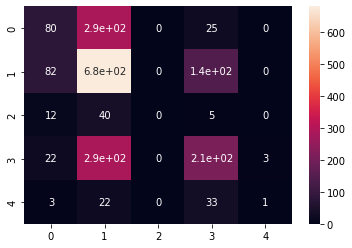

In [55]:
### Código GridSearch
params = {"clf": xgb.XGBClassifier(verbosity = 0, silent=True),
         "clf__n_estimators": [40,80],
         "clf__max_depth":[8,10],
         "clf__learning_rate":[0.1,0.05 ,0.01],
         'features': SelectPercentile(f_classif),
         'features__percentile': [60,90]}


clf = params["clf"]
params.pop("clf")

features = params["features"]
params.pop("features")

pipeline = Pipeline([("ColumnTransformer", ct),
                ("features", features),
                ("clf", clf)])

grid = GridSearchCV(pipeline, param_grid=params,scoring="f1_macro",n_jobs=4,verbose=3)
grid.fit(X_train_c, y_train_c)
clf_pipe_xgb = grid.best_estimator_
y_pred = clf_pipe_xgb.predict(X_test_c)
print(f"Clasificador {clf}")
print(f"Mejores estimadores {grid.best_estimator_}")
print(classification_report(y_test_c, y_pred))
matriz = confusion_matrix(y_test_c, y_pred)
sns.heatmap(matriz, annot=True)

Tras la optimización de hiperparámetros, se nota una mejora en los valores de la métrica F1 score para la mayoría de las clases, no obstante, el F1 Macro se mantuvo

---

## 5. Regresión


### 5.1 Dummy y Baseline

Para esta sección, se realizará una comparación entre un modelo dummy y un modelo a nuestra elección. Tras intentar con diversos regresores como lo son: Lasso, ElasticNet y XGBoostRegressor, decidimos quedarnos con este último y optimizar la búsqueda de hiperparámetros sobre este modelo.


In [58]:
## Código Dummy
from sklearn.dummy import DummyRegressor

dummy_pipe=Pipeline([('ColumnTransform', ct) , 
                    ('Regresor', DummyRegressor(strategy="mean"))]) 

dummy_pipe.fit(X_train_r, y_train_r)

dummy_y_pred = dummy_pipe.predict(X_test_r)

In [59]:
## Código Regresor
rgr_pipe =Pipeline([('ColumnTransform', ct) , 
                       ('Regresor', xgb.XGBRegressor())])

rgr_pipe.fit(X_train_r, y_train_r)

elastic_y_pred = rgr_pipe.predict(X_test_r)

In [60]:
## Código Comparación de métricas (solo con overview)
print("Resultados Dummy:")
print(" ")
print(f" R² score: {r2_score(y_test_r, dummy_y_pred)}")  
print(" ")
print("Resultados XGBRegressor:")
print(" ")
print(f" R² score: {r2_score(y_test_r, elastic_y_pred)}")   

Resultados Dummy:
 
 R² score: -0.002436690561306909
 
Resultados XGBRegressor:
 
 R² score: 0.5632002636201335


Tras comparar el modelo Dummy con el modelo XGBoostRegressor sin optimización de parámetros, se nota que de por si ya tiene mejores resultados, por lo que nuestro modelo a priori predice mejor que un modelo que escoje valores al azar.

---

### 5.2 Búsqueda del mejor modelo de Regresión




Para la búsqueda de los mejores hiperparámetros del modelo de XGBoostRegressor se utilizará GridSearchCV la cual es una grilla que va probando las distintas combinaciones de hiperparámetros y las va evaluando en cierta cantidad de Folds o "carpetas" (por defecto son 5) y luego, se elije el modelo que obtenga mejor métrica (para nuestro caso de regresión, se eligió la métrica $R^{2}$).

In [62]:
params = {'reg': xgb.XGBRegressor(),
          'reg__learning_rate': (0.01,0.05,0.1),
          'reg__max_depth': [5, 10, 12],
          'features': SelectPercentile(f_regression),
          'features__percentile': [60, 90]
          
         }

reg = params["reg"]
params.pop("reg")

features = params["features"]
params.pop("features")


pipeline = Pipeline([("ColumnTransformer", ct),
                ("features", features),
                ("reg", reg)])

grid = GridSearchCV(pipeline, param_grid=params,scoring="r2", n_jobs=4,verbose=3)
grid.fit(X_train_r, y_train_r)
rgr_pipe_xgb = grid.best_estimator_
y_pred = rgr_pipe_xgb.predict(X_test_r)
print(f"Clasificador {reg}")
print(f"Mejores estimadores {grid.best_estimator_}")
print(f" R² score: {r2_score(y_test_r, y_pred)}")   

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Clasificador XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
Mejores estimadores Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(transformers=[('bog1',
                                                  CountVectorizer(ngram_range=(1

In [63]:
print(f" R² score: {r2_score(y_test_r, y_pred)}")   

 R² score: 0.594506040051147


Tras la optimización de parámetros, se obtuvo una leve mejora en el $R^2$ score

---

### Código de predicción para competencia en CodaLab



In [64]:
from zipfile import ZipFile
import os

def generateFiles(predict_data, clf_pipe, rgr_pipe, LabelEncoder):
    """Genera los archivos a subir en CodaLab

    Input
    predict_data: Dataframe con los datos de entrada a predecir
    clf_pipe: pipeline del clf
    rgr_pipe: pipeline del rgr

    Ouput
    archivo de txt
    """
    y_pred_clf = clf_pipe.predict(predict_data)
    y_pred_clf = LabelEncoder.inverse_transform(y_pred_clf)
    y_pred_rgr = rgr_pipe.predict(predict_data)
    
    with open('./predictions_clf.txt', 'w') as f:
        for item in y_pred_clf:
            f.write("%s\n" % item)

    with open('./predictions_rgr.txt', 'w') as f:
        for item in y_pred_rgr:
            f.write("%s\n" % item)

    with ZipFile('predictions.zip', 'w') as zipObj2:
       zipObj2.write('predictions_rgr.txt')
       zipObj2.write('predictions_clf.txt')

    os.remove("predictions_rgr.txt")
    os.remove("predictions_clf.txt")

In [65]:
# Ejecutar función para generar el archivo de predicciones.
# perdict_data debe tener cargada los datos del text.pickle
# mientras que clf_pipe y rgr_pipe, son los pipeline de 
# clasificación y regresión respectivamente.
generateFiles(X_test_codlab, clf_pipe_xgb, rgr_pipe_xgb, label_encoder)

---

## 6. Conclusiones

Tras finalizar el proyecto, se pudo cumplir con el objetivo de lograr obtener un modelo que funcione mejor que uno que tome decisiones al azar. Por otro lado, las métricas obtenidas en el conjunto de prueba, aquel que fue utilizado en la competencia de CodaLab, se obtuvo unos resultados bastante aceptables, considerando la dificultad de los problemas. Con respecto al aporte de la EDA, esta permitió dar indicios acerca de qué variables pueden ser importantes a la hora de entrenar un modelo, permitiendonos obtener mejores resultados.

En relación a la implementación del modelo de clasificación, inicialmente se tiene un baseline de f1-score macro igual a 0,21 para el modelo dummy y 0,27 para el modelo XGBoostClassifier implementado sin optimización de parámetros. Posteriormente, al realizar la optimización sobre este último modelo utilizando una grilla de búsqueda se obtuvo un f1-score macro equivalente a 0,27, por lo que si bien logró superar el baseline del modelo dummy, el correspondiente al mismo modelo sin optimizar se mantuvo igual.  Sin embargo, en el modelo optimizado se pueden observar mejoras en otras métricas, entre las que se destaca lo sucedido con la Precisión, que aumentó en promedio 0,03 puntos por clase (a excepción de la clase 0 correspondiente a “Negative”), y en menor grado el Accuracy, que solo aumentó en 0,01. 
Por otro, en los resultados obtenidos en la competencia, se obtuvo un f1-score equivalente a 0,74 para la predicción realizada por el modelo XGBoostClassifier optimizado, lo que es una mejora significativa del baseline, pero que también puede estar sujeto a la cantidad de muestras que se debían predecir para la competencia.

Por otro lado, con respecto a los resultados obtenidos para el problema de regresión, se obtuvo que el rendimiento del baseline fue bastante aceptable, considerando que lograr predecir la cantidad de ingresos de una película en función de sus características es un problema complejo. Con respecto a la optimización del modelo, se logró obtener mejores métricas de $R^{2}$ Score, dónde en el conjunto de validación se obtuvo una mejora del 0.563 sin optimización a 0.59 con búsqueda de parámetros. 


A partir de los resultados obtenidos tanto para el clasificador como el regresor se puede concluir que se lograron cumplir los objetivos principales del proyecto, ya que en ambos casos se logró superar las métricas a evaluar del modelo dummy. Sin embargo, se considera que aún existen mejoras a realizar en la modelación del problema que permitirían obtener resultados más destacados, como por ejemplo la creación de nuevas variables, el uso de nuevos algoritmos y el ajuste de parámetros con grillas de búsqueda más exhaustivas, ya que por temas de tiempo estás se tuvieron que limitar.

Finalmente, respecto a los aprendizajes obtenidos se destaca la experiencia obtenida respecto a la metodología que se debe implementar para resolver este tipo de problemas. En particular, se destaca lo relacionado al proceso de Feature Engineering, ya que en un principio se consideraba trabajar solo con las variables iniciales, no obstante, posteriormente se observó que los resultados mejoraron considerablemente con la agregación de nuevas características. Por otro lado, en el futuro se espera profundizar más acerca del procesamiento de texto, ya que esta fue una de las mayores dificultades presentadas en el proyecto.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>